In [1]:
import numpy as np
import dedalus_sphere.sphere as spherical
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4,suppress=True,linewidth=120)

def chop(X):
    w = np.where(np.abs(X)<1e-9)
    X[w] = 0
    print(X)
    print()

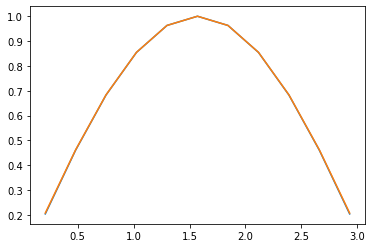

In [2]:
Lmax = 10
z,w = spherical.quadrature(Lmax,dtype='float128')

theta = np.arccos(z)

plt.plot(theta,w/np.max(w))
plt.plot(theta,np.sin(theta))

In [ ]:
Y = spherical.harmonics(Lmax,0,0,z)

chop(Y*w @ Y.T)
chop(Y.T @ Y*w)

In [ ]:
Lms = L,m,s = 10,3,2

Sin = spherical.operator('Sin')
Cos = spherical.operator('Cos')

chop(( Cos**2 + Sin(+1) @ Sin(-1) )(*Lms).square.A)

In [ ]:
D = spherical.operator('D')
S = spherical.operator('S')
L = spherical.operator('L')

chop(( D(-1)@D(+1) +  D(+1)@D(-1) + L@(L+1) - S**2 )(*Lms).A)

chop((D(-1) * D(+1) - S)(*Lms).A)

In [ ]:
chop((Sin(+1) * D(+1))(*Lms).A)
chop((Sin(-1) * D(-1))(*Lms).A)

In [ ]:
chop(( D(+1) * Sin(-1)  - 2**(1/2) * Cos )(*Lms).A)
chop(( D(-1) * Sin(+1)  - 2**(1/2) * Cos )(*Lms).A)

In [ ]:
Pi = spherical.operator('Pi')

In [ ]:
Pi.codomain